<a href="https://colab.research.google.com/github/andrevcmelo/BootcampAlura2021/blob/main/BootcampAlura_Modulo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importação de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

plt.style.use('ggplot')

#### Importação de Dados

Link da base de dados:
https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv", 
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")

#Definindo formato dos registros tipo númerico
pd.options.display.float_format = "{:.2f}".format
#Avaliando as linhas iniciais do dataset
dados.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.8

In [3]:
#Avaliando as linhas finais do dataset
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,102298314.76,100260145.30,95917106.56,102331615.05,93971904.79,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86051002.13,100531035.83,101374341.51,11958647088.33
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,19870933.20,18913862.69,19591383.84,18935437.09,17230688.81,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17331445.92,18755557.92,19241624.02,2172157981.36
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,16314811.22,16763581.32,15608982.84,15855641.23,15811477.04,15029205.51,15249241.20,15046851.63,14886817.29,12546999.04,13604225.34,13151005.63,16371639.49,17790649.87,2036923784.59
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.42,2498

In [4]:
#Avaliando as informações do dataset: tipos de dados, quantidade de colunas e registros
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [5]:
#Avaliando estatísticas básicas dos campos numéricos do dataset
dados.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,15126846.64,22710158.12,24594187.35,25431957.83,26511245.91,27858576.43,28332973.51,27800320.31,27887505.26,27148854.29,24748781.93,28739553.21,27779578.57,28021517.95,31180857.91,30559470.48,32067740.96,31580672.71,32611202.77,33068227.21,32419807.37,32189393.28,31167981.22,31560092.18,29928809.93,32999254.94,33416032.93,33861926.64,32998566.05,33776633.08,34508112.22,33571030.22,33202549.09,34260578.08,33722132.00,33068418.63,32743959.68,34540839.00,34834165.09,35148078.99,...,46592572.02,44858620.70,46445335.60,46943697.67,45819920.30,46310661.30,45372052.00,44512155.12,45130688.08,42984468.06,46280398.95,46872938.71,47404348.88,47142979.23,48204529.71,48763775.45,47130713.08,47999574.50,46453738.64,45127706.24,47713863.09,45430176.33,47199783.51,48164467.53,50274331.13,48455666.28,50858976.35,51086007.98,49509771.01,51159255.15,48652124.79,47233303.11,49148617.53,47618476.39,47593665.11,41013660.39,44193633.75,47329994.46,54495511.57,5993731798.30
std,19159188.30,30879444.07,32516725.69,33339066.25,37540771.63,38676893.04,39292968.91,37748913.80,38226540.65,36671387.56,34302651.64,39263230.84,37988016.94,38472973.83,43107877.67,41375865.01,43820473.72,43730638.41,44931951.46,46760267.58,44723736.91,44657514.59,42490731.84,43451336.50,41128727.38,45902372.56,46619168.65,46583768.83,45800691.66,46621043.56,47569222.69,47049920.20,45173519.54,48351100.75,47965880.74,46035492.78,46621888.15,48716789.21,47927983.93,49430916.96,...,62025560.03,57705113.72,62349149.63,62507148.99,59281419.38,60178793.71,59424265.29,58898151.60,59061757.59,56509401.30,60497498.93,61142944.73,61925710.33,61154374.79,62216643.96,63370716.30,60726402.82,62486400.14,60454412.46,59916454.67,62828831.11,59362996.81,61110607.09,62936176.09,64576982.68,62355902.11,65323980.41,66360324.67,63439145.10,66313422.91,62260089.17,60600178.14,64234554.84,61318083.40,62171030.87,52900705.99,56856933.02,62255310.10,73974287.16,8057806560.09
min,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1746538.99,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1525752.37,1572809.36,1653304.86,1685303.78,1773604.15,1643518.23,1811346.65,1654294.56,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658.62,...,1897787.14,2050824.29,1881406.55,1940174.73,1923150.03,2036787.91,1876731.42,1716855.56,1836149.63,1954823.32,1882553.32,1781034.49,1821567.42,2120412.72,1910968.09,2453555.40,2619709.86,2637161.32,2139141.93,2123426.26,2527888.58,1906429.95,1923440.17,2411628.00,2495491.03,2117098.07,2388704.49,2905190.27,2145557.83,2455947.45,2310514.38,2296699.42,2333822.65,2310195.65,1842472.54,1705873.64,2065055.35,20

#### Tratamentos Iniciais dos Dados

Podemos identificar que Agosto/2020 não foi incluído no describe, pois existe algum dado em formato não numérico. Este problema pode estar afetando alguma outra coluna que não conseguimos ver. 

**Método 1 de Tratamento da Base:**
Exluindo as colunas com valores nulos. Deste modo, perdemos dados de meses por completo, mas mantemos os dados padronizados.

In [6]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',


In [7]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7700730.62,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,3268651.85,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,14585552.51,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,2510634.79,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,26

In [8]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head(5)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,4769347.86,...,7700730.62,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,929129659.72
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,2723636.56,...,3268651.85,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,420668039.63
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,11061892.22,...,14585552.51,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,1771654871.23
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658.62,

**Método 2 de Tratamento da Base:**
Transformando os valores em branco em 0. Deste modo, continuamos com o valor da maioria dos meses, apesar de termos um valor 0 que possa distorcer alguns cálculos.

Portanto, vamos tratar dando *replace()* para inserir 0 nos brancos e alterando todos os tipos de dados das colunas com valores numéricos (2008/Jan até Total).

In [9]:
dados_fill0 = dados.replace('-', 0)
dados_fill0.iloc[:,1:] = dados_fill0.iloc[:,1:].astype('float64')
dados_fill0.describe()
dados_fill0.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,0.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,0.00,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,302

**Método 3 de Tratamento da Base:**
Inserindo a média do valor do ano que possui o mês 'null' no valor nulo.

In [10]:
def media_ano(linha, ano_null):
  ano = str(ano_null[0:4])
  linha_df = linha.filter(like=ano, axis=0).dropna()
  media = linha_df.mean()
  return media
  
dados_novo = dados.replace('-', np.nan)

for index, row in dados_novo.iterrows():
  if dados_novo[index:index+1].isnull().sum().sum() >= 1:
    for col in dados_novo[index:index+1].columns[1:]:
      if dados_novo[col].isnull().sum() >= 1:
        df = pd.DataFrame(row)
        v_media = media_ano(df,col)
        dados_novo[index:index+1][col].fillna(v_media, inplace=True)

dados_novo.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2485375.29,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3138417.09,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,26

**Decidi utilizar o dataset do Médoto 3 para dar continuidade nas análises, pois o valor tende a ser mais próximo a uma realidade.**

O campo *'Unidade da Federação'* está com um código + nome da UF. Irei tratar para separar estes valores e deixar os campos melhor apresentados.

In [11]:
dados_novo.iloc[:,1:] = dados_novo.iloc[:,1:].astype('float64')
#Adição da Coluna 'Cod_UF' com o número do Estado
dados_novo['Cod_UF'] = dados_novo['Unidade da Federação'].str.slice(0,2)
#Alteração do campo 'Unidade da Federação' para ter somente o valor texto com o nome do Estado
dados_novo['Unidade da Federação']  = dados_novo['Unidade da Federação'].str.slice(3,)

dados_novo[['Cod_UF','Unidade da Federação']].head(5)

,Cod_UF,Unidade da Federação
0,11,Rondônia
1,12,Acre
2,13,Amazonas
3,14,Roraima
4,15,Pará


Apresentando a versão final da base de dados

In [12]:
dados_novo = dados_novo.sort_values('Total', ascending=False).set_index('Unidade da Federação')
dados_novo.head(5)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,Cod_UF
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,167990352.53,191857317.83,182797194.35,186855294.82,212777859.48,203186114.01,217040531.70,217195249.91,220761157.51,232536720.14,220292973.66,221987951.33,220117480.90,209094405.40,214565774.66,203116173.19,227248380.06,231543598.66,230188803.42,226021072.14,229662643.34,234530618.12,233453453.42,221127119.42,239790045.49,236929144.68,227533337.27,231062206.94,241947462.16,236443416.78,...,297881361.74,297309345.90,280813753.04,285740593.74,280768835.63,280080500.10,279203782.81,269524844.81,286775733.92,289711791.16,293104281.74,287922148.67,291524922.05,298702204.56,282739086.76,295671659.07,283947815.42,283179040.80,298180056.65,279427204.24,288819396.39,297834670.24,303889049.22,293587709.50,305033842.80,313868712.55,298547868.27,310847061.00,292851698.72,284749770.52,304505286.22,288872273.89,297335842.20,251320040.41,272486957.70,306425499.30,366721243.71,346512263.17,38929549655.89,35
Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,78329947.11,86917741.55,91374305.25,90153672.61,95290591.54,94091211.77,99076844.10,96189182.42,102754354.58,100080062.68,96911075.38,97956440.66,100726279.56,95354390.87,99017646.65,91519360.96,101602091.09,102020854.18,103346519.08,102489257.42,104427655.72,104334532.58,102057421.34,102296496.62,104624739.27,106029536.34,102848906.27,103097090.32,107148899.31,109395956.79,...,146849636.29,152645703.34,144488574.05,143939472.31,145123339.34,142848565.53,143158486.97,136705143.41,149829968.56,149894503.75,151546897.83,151514201.61,156680218.93,154281495.01,153867888.29,151228318.67,144867656.44,146715346.61,154066649.81,147968852.80,153459790.69,156777495.40,162963014.15,154830086.49,166207471.07,164287071.70,156567882.88,165120780.19,153006371.54,153880105.15,159196641.54,150118896.34,142773027.09,133340766.09,133388804.72,139699763.30,164891823.64,168024412.95,19160106499.88,31
Paraná,38266347.46,55384670.52,53801318.85,52460306.69,54419620.71,57811688.48,58094241.83,56982774.90,57549082.26,57121887.41,53117936.61,63910909.46,64523066.04,60783727.39,65633573.31,64759375.78,65902215.41,66280753.00,69158603.32,68256573.41,65843824.73,66394412.26,66395558.19,67070814.17,65492818.75,62237724.45,70702537.78,70374693.61,72058180.69,71935547.82,72371869.39,74708055.69,72785908.90,72851750.47,75595725.52,74366096.98,75110313.47,72128616.95,73759982.82,76599030.33,...,116359245.54,117872309.11,111878379.52,115332028.47,114669021.47,115173908.32,118799559.86,110307818.83,116630188.99,120061032.48,121360733.68,122174618.88,124610255.04,127874482.35,123933024.51,125316844.05,125317336.68,117528767.93,122460918.04,119836506.38,123286810.02,120177202.18,126481772.97,125528571.51,125978907.59,126174536.45,126954366.08,131578320.06,127090701.66,117896293.89,122349509.69,127000113.31,117308075.66,94599403.51,107503816.77,96977288.37,109658360.43,129375911.54,13786964617.27,41
Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,5611

In [13]:
dados_novo.index

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

## Módulo 01

#### Análise de Dados

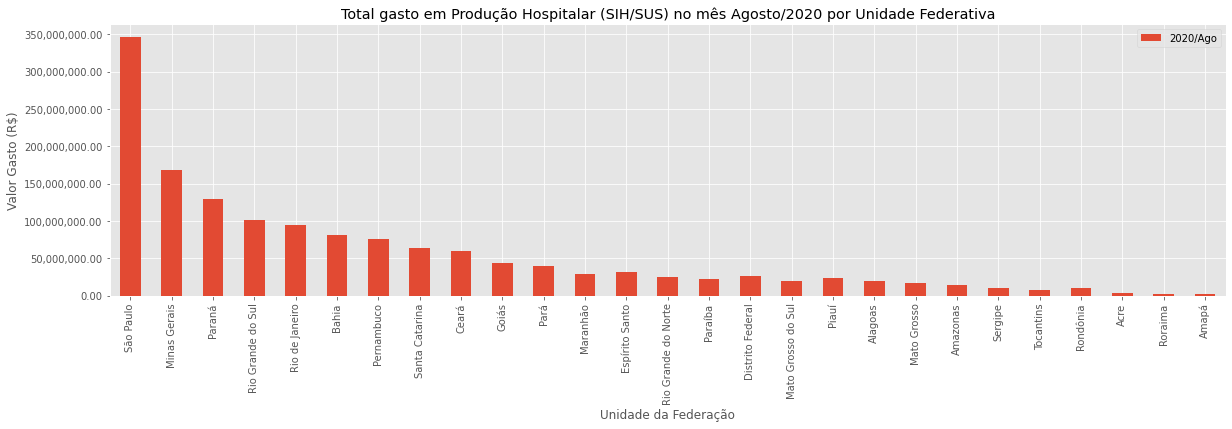

In [14]:
#Gráfico inicial para os gastos de Agosto/2020 por ciadade
ax = dados_novo.plot(y='2020/Ago', kind = 'bar', figsize=(20,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.title('Total gasto em Produção Hospitalar (SIH/SUS) no mês Agosto/2020 por Unidade Federativa')
plt.show()

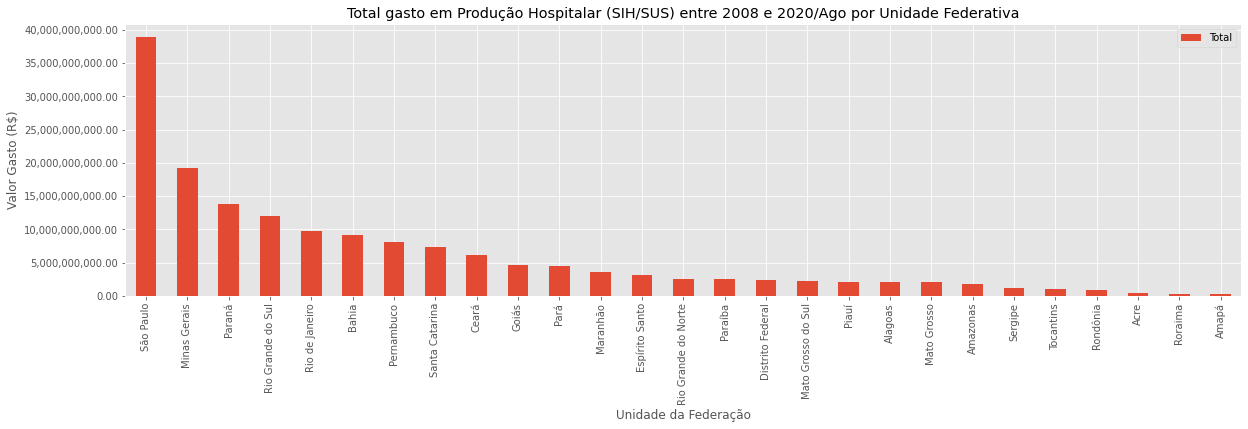

In [15]:
#Gráfico com os gastos históricos por UF
ax = dados_novo.plot(y='Total', kind = 'bar', figsize=(20,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.title('Total gasto em Produção Hospitalar (SIH/SUS) entre 2008 e 2020/Ago por Unidade Federativa')
plt.show()

Inserindo Região aos Estados

In [16]:
dados_novo['Região'] = ''

for index,row in dados_novo.iterrows():
  if index == 'São Paulo' or index ==  'Rio de Janeiro' or index ==  'Minas Gerais' or index ==  'Espírito Santo':
    dados_novo.loc[index, 'Região'] = "Sudeste"
  elif index == 'Amazonas' or index ==  'Roraima' or index ==  'Rondônia' or index ==  'Amapá' or index ==  'Acre' or index ==  'Pará' or index ==  'Tocantins':
    dados_novo.loc[index, 'Região'] = "Norte"
  elif index == 'Mato Grosso' or index ==  'Mato Grosso do Sul' or index ==  'Goiás' or index ==  'Distrito Federal':
    dados_novo.loc[index, 'Região'] = "Centro-Oeste"
  elif index == 'Santa Catarina' or index ==  'Rio Grande do Sul' or index ==  'Paraná':
    dados_novo.loc[index, 'Região'] = "Sul"
  else:
    dados_novo.loc[index, 'Região'] = "Nordeste"


In [17]:
dados_novo_invertido = dados_novo.sort_values('Total', ascending=False).T
dados_novo_invertido2 = dados_novo_invertido.drop(["Total","Cod_UF","Região"])

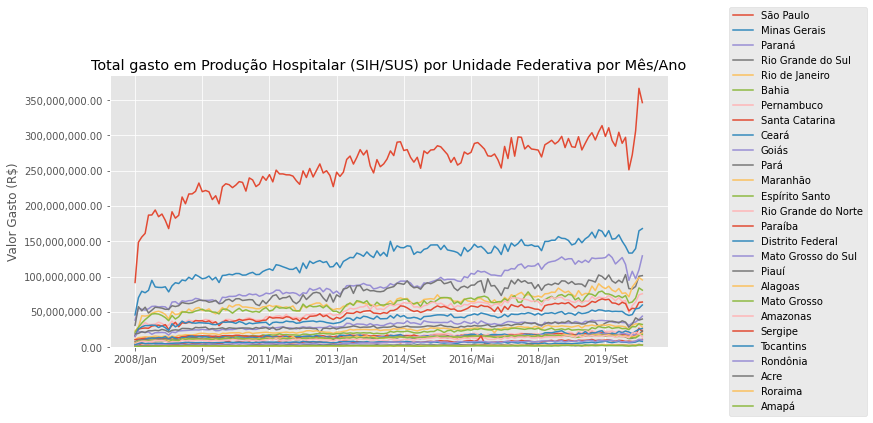

In [18]:
ax = dados_novo_invertido2.plot(figsize=(10,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.ylim(0,)
plt.title('Total gasto em Produção Hospitalar (SIH/SUS) por Unidade Federativa por Mês/Ano')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

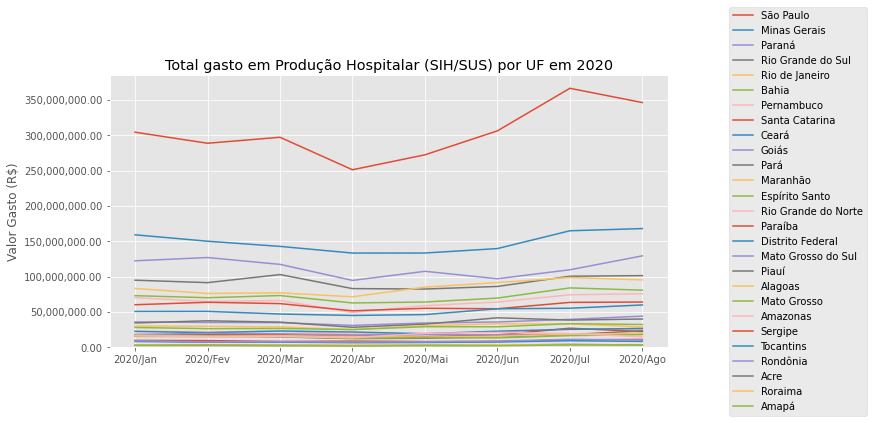

In [19]:
ax = dados_novo_invertido2.loc['2020/Jan':].plot(figsize=(10,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.ylim(0,)
plt.title('Total gasto em Produção Hospitalar (SIH/SUS) por UF em 2020')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

Agrupando os valores por Região

In [20]:
dados_regiao = pd.DataFrame(dados_novo.reset_index(drop=True).groupby('Região').sum('Total'))
dados_regiao.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,30229247.60,45578504.19,47399895.34,49611542.91,53509757.59,52247325.49,52518777.97,53276290.82,53304415.70,54895047.77,45038102.41,55130658.78,53100416.54,53501743.79,59993720.19,58610439.74,63196728.91,63894989.85,62526556.94,62444623.46,62523095.63,63358616.04,60929391.38,59048172.29,62017930.88,58971107.41,64030568.60,62324704.17,64029030.34,61688970.94,64263618.40,66850400.90,64934598.66,62420869.33,63933820.62,62653188.33,61774776.35,59803757.77,68917193.73,69565262.37,...,81080093.70,82845750.31,85419068.47,87411523.84,83947084.79,84743937.29,81484915.10,83458651.92,81213468.36,89813404.98,86611055.49,87325145.39,90320816.60,91565971.85,89255553.53,87269745.96,85180303.08,81420006.41,79522197.78,86692650.24,85157069.25,91853240.42,88966685.68,92391941.49,92511604.01,96171126.14,96966360.49,90541012.77,89959031.50,88603665.23,86566987.18,91481380.62,90238478.93,91660760.15,82390344.07,84880811.73,88888259.97,99802021.11,107543172.33,11296365275.41
Nordeste,95549236.04,134694550.73,153046619.08,167740477.39,168061294.21,174175276.89,177468464.39,174109441.29,173410656.47,165710324.70,153162228.67,178958400.60,161275540.20,172933736.48,193456354.99,192939207.77,201794145.05,196937822.81,199504464.17,200828759.45,205095590.61,202660481.80,201641760.44,198140172.85,195183584.52,185335583.97,205815390.02,211564608.98,210887028.56,200573690.09,205178183.64,214990485.86,202882691.03,204988891.88,208099629.62,200393728.81,202813746.74,201090572.28,208453179.11,218015003.68,...,291729204.06,286301633.14,289301311.85,293904777.50,301054138.42,285323031.55,281312136.13,285147463.89,269286958.01,291498626.74,297300181.60,304211639.26,293424544.46,307846825.52,310534503.33,296151612.52,303098260.28,295463309.67,281185829.30,299639707.04,281522047.53,299954357.62,305121095.18,321163055.47,306798968.39,320555832.54,321880404.04,314216965.36,320397480.13,310753760.05,299234210.62,306914581.95,296552600.98,294058369.15,252481578.43,269020187.07,297869801.39,346043545.01,345932936.57,37384256278.39
Norte,31111673.48,38133606.94,41368641.06,39323606.29,41786447.14,42153961.69,46817070.73,45797885.42,48086682.93,45339281.23,40399486.79,45305661.91,45942006.21,44316806.08,51777252.96,51854344.38,51986020.34,50114708.25,53555754.73,53094110.29,54067845.27,53767886.65,49324202.20,51290856.32,51134610.72,50125462.94,53006749.67,52912221.69,54837151.71,54943063.61,54437521.56,52633156.86,53192532.89,53819623.85,53997143.51,51807947.46,54994036.14,51646496.74,53602489.18,56067475.16,...,66536861.23,68531487.18,68710339.57,70264133.04,71573687.78,68536898.96,67267305.18,66830087.35,65998000.69,69238448.24,70726089.02,68480881.39,72421141.54,70058096.70,72768779.04,71197568.20,76491518.05,71140874.37,69768972.11,73526441.31,68054351.30,72543941.97,75563076.06,77100496.31,72920735.69,71109586.44,73644562.10,76421192.18,77744846.74,77230413.44,73836893.27,76407310.78,75454124.81,73738000.37,62252367.81,74339710.37,87090234.26,88249386.02,82070531.06,9155215791.07
Sudeste,165832115.74,256368087.71,290135265.09,293672101.39,322783478.59,343470119.43,342666217.02,333078346.82,335235903.56,324357208.00,297684366.77,343153774.38,332247499.04,337262

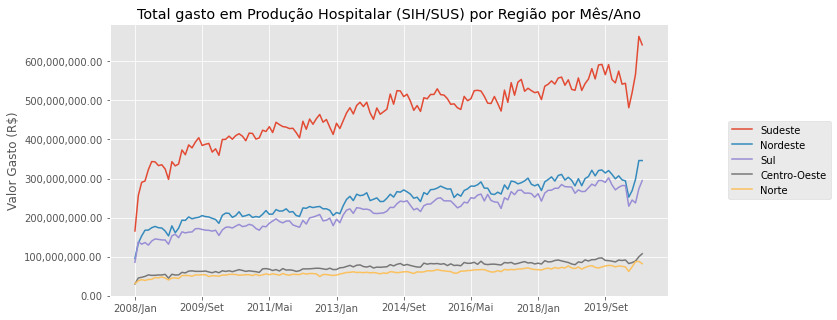

In [21]:
dados_regiao_grafico = dados_regiao.sort_values('Total', ascending=False).drop(columns='Total')
ax = dados_regiao_grafico.T.plot(figsize=(10,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.ylim(0,)
plt.title('Total gasto em Produção Hospitalar (SIH/SUS) por Região por Mês/Ano')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

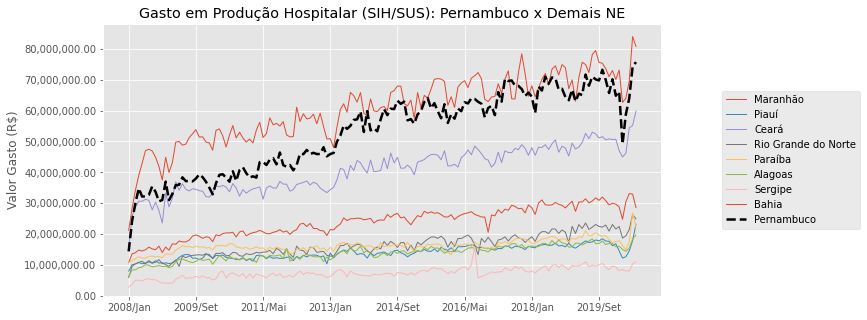

In [22]:
#dados_novo_invertido2.loc['2008/Jan':]['Pernambuco']
#dados_novo_invertido2.loc['2008/Jan':][['Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Alagoas','Sergipe','Bahia']]

ax = dados_novo_invertido2.loc['2008/Jan':][['Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Alagoas','Sergipe','Bahia']].plot(figsize=(10,5),linewidth=1.0)
plt.plot(dados_novo_invertido2.loc['2008/Jan':]['Pernambuco'],label='Pernambuco', color='black',linewidth=2.5, linestyle="--")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.ylim(0,)
plt.title('Gasto em Produção Hospitalar (SIH/SUS): Pernambuco x Demais NE')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

## Módulo 02

### Aula 01
**Desafios:**

1) Importar os dados da população do Wikipedia (html)

2) Juntar as tabelas de gastos do último mês com a população importada do Wikipedia

In [23]:
#Lendo dados da população brasileira por estado do Wikipedia: Forma 01 - Copiando o texto direto do Wikipedia e usando o StringIO

from io import StringIO

dados_popupacao = """Posição	Unidade federativa	População	% da pop. total	País comparável(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

#Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

dados_popupacao_io = StringIO(dados_popupacao)

dados_populacao_wiki = pd.read_csv(dados_popupacao_io, sep='\t')
dados_populacao_wiki.head(5)

,Posição,Unidade federativa,População,% da pop. total,País comparável(habitantes)
0,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
1,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [24]:
dados_populacao_wiki['Populacao'] = dados_populacao_wiki['População'].apply(lambda x: int(str(x).replace(' ', '')))
dados_populacao_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Posição                      27 non-null     int64 
 1   Unidade federativa           27 non-null     object
 2   População                    27 non-null     object
 3   % da pop. total              27 non-null     object
 4   País comparável(habitantes)  27 non-null     object
 5   Populacao                    27 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ KB


In [25]:
#Lendo dados da população brasileira por estado do Wikipedia: Forma 02 - Utilizando o BeautifulSoup
dados_populacao_wiki_html = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",
                               header = 0,
                               match = "Unidade federativa"
                               )
df_dados_populacao_wiki_html = dados_populacao_wiki_html[0]
df_dados_populacao_wiki_html.head(5)

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [26]:
df_dados_populacao_wiki_html['Populacao'] = df_dados_populacao_wiki_html['População'].apply(lambda x: int(str(x).replace(' ', '')))
df_dados_populacao_wiki_html.head(5)

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes),Populacao
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864),46289333
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000),21292666
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900),17366189
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000),14930634
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651),11516840


Juntar os gastos do último mês com a população do Wikipedia

In [27]:
# Organizando o dataset dos gastos
dados_mod_2 = pd.DataFrame(dados_novo.reset_index())
dados_mod_2 = dados_mod_2[['Unidade da Federação','2020/Jul','2020/Ago']].rename(columns={'Unidade da Federação':'UF','2020/Jul':'Gastos_Jul/2020','2020/Ago':'Gastos_Ago/2020'}).set_index('UF')
dados_mod_2.head(5)

,Gastos_Jul/2020,Gastos_Ago/2020
UF,,
São Paulo,366721243.71,346512263.17
Minas Gerais,164891823.64,168024412.95
Paraná,109658360.43,129375911.54
Rio Grande do Sul,100531035.83,101374341.51
Rio de Janeiro,98722687.54,95274486.35


In [28]:
# Organizando o dataset da população Wikipedia
df_pop_wiki = df_dados_populacao_wiki_html[['Unidade federativa','Populacao']].rename(columns={'Unidade federativa':'UF'}).set_index('UF')
df_pop_wiki.head(5)

,Populacao
UF,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [29]:
# Juntar os dados das tabelas
# Como ambas as tabelas estão com os índices padronizados, ao referenciarmos a função JOIN, ele automaticamente reconhece a chave primária
join_pop_gastos = df_pop_wiki.join(dados_mod_2)
join_pop_gastos.head(5)

,Populacao,Gastos_Jul/2020,Gastos_Ago/2020
UF,,,
São Paulo,46289333,366721243.71,346512263.17
Minas Gerais,21292666,164891823.64,168024412.95
Rio de Janeiro,17366189,98722687.54,95274486.35
Bahia,14930634,83992134.91,80793117.08
Paraná,11516840,109658360.43,129375911.54


### Aula 02

In [30]:
#Criando campo de gasto (aproximado) por habitante no mês de Agosto de 2020 
join_pop_gastos['Gasto_por_hab_Ago2020'] = join_pop_gastos['Gastos_Ago/2020'] / join_pop_gastos['Populacao']
join_pop_gastos['Gasto_por_hab_Jul2020'] = join_pop_gastos['Gastos_Jul/2020'] / join_pop_gastos['Populacao']
join_pop_gastos.head(5)

,Populacao,Gastos_Jul/2020,Gastos_Ago/2020,Gasto_por_hab_Ago2020,Gasto_por_hab_Jul2020
UF,,,,,
São Paulo,46289333,366721243.71,346512263.17,7.49,7.92
Minas Gerais,21292666,164891823.64,168024412.95,7.89,7.74
Rio de Janeiro,17366189,98722687.54,95274486.35,5.49,5.68
Bahia,14930634,83992134.91,80793117.08,5.41,5.63
Paraná,11516840,109658360.43,129375911.54,11.23,9.52


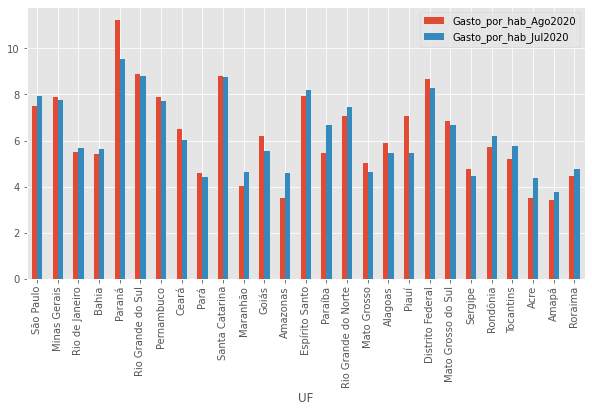

In [31]:
join_pop_gastos[['Gasto_por_hab_Ago2020','Gasto_por_hab_Jul2020']].plot(kind='bar', figsize=(10,5))

Desafio: Ordenar por gasto por habitantes e plotar o mesmo gráfico

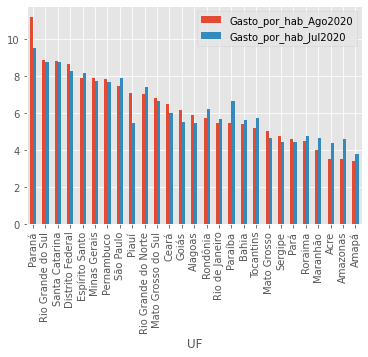

In [32]:
join_pop_gastos_2 = join_pop_gastos.sort_values('Gasto_por_hab_Ago2020', ascending = False)
join_pop_gastos_2[['Gasto_por_hab_Ago2020','Gasto_por_hab_Jul2020']].plot(kind = 'bar')

Desafio: População x Gasto dos últimos meses

Desafio2: Plotar os 2 últimos meses em gráficos separados

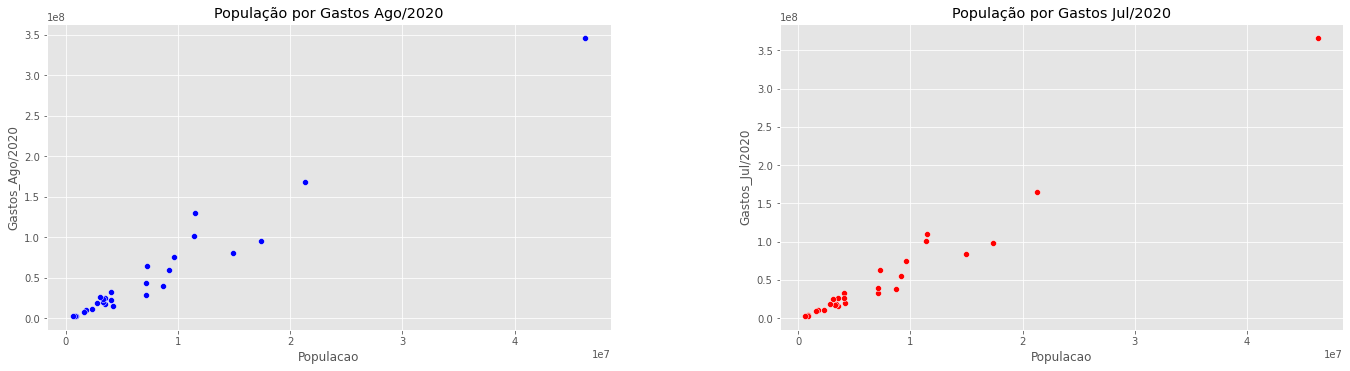

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.scatterplot(ax = axs[0], data = join_pop_gastos, x = 'Populacao', y = 'Gastos_Ago/2020', color='blue').set_title('População por Gastos Ago/2020')
sns.scatterplot(ax = axs[1], data = join_pop_gastos, x = 'Populacao', y = 'Gastos_Jul/2020', color = 'red').set_title('População por Gastos Jul/2020')
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)

plt.show()

Desafio: População x Gasto por habitantes

Desafio2: Plotar os 2 últimos meses no mesmo gráfico

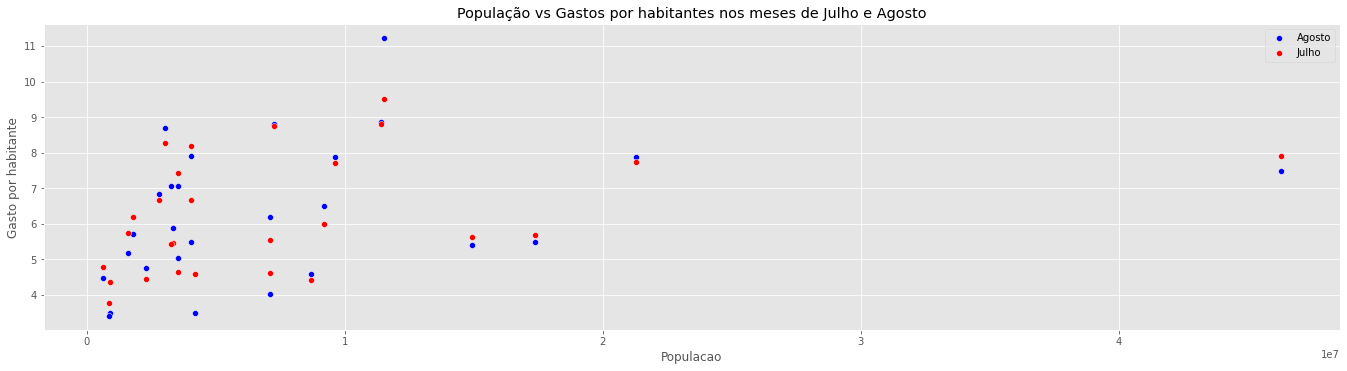

In [34]:
fig, axs = plt.subplots(1, 1, figsize=(20,5))
sns.scatterplot(ax = axs, data = join_pop_gastos, x = 'Populacao', y = 'Gasto_por_hab_Ago2020', color = 'blue', label = 'Agosto')
sns.scatterplot(ax = axs, data = join_pop_gastos, x = 'Populacao', y = 'Gasto_por_hab_Jul2020', color = 'red', label = 'Julho')
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)
axs.set_title('População vs Gastos por habitantes nos meses de Julho e Agosto')
axs.legend(loc='best');
axs.set_ylabel('Gasto por habitante')
plt.show()

### Aula 03

Plotar os gastos de Pernambuco por mês

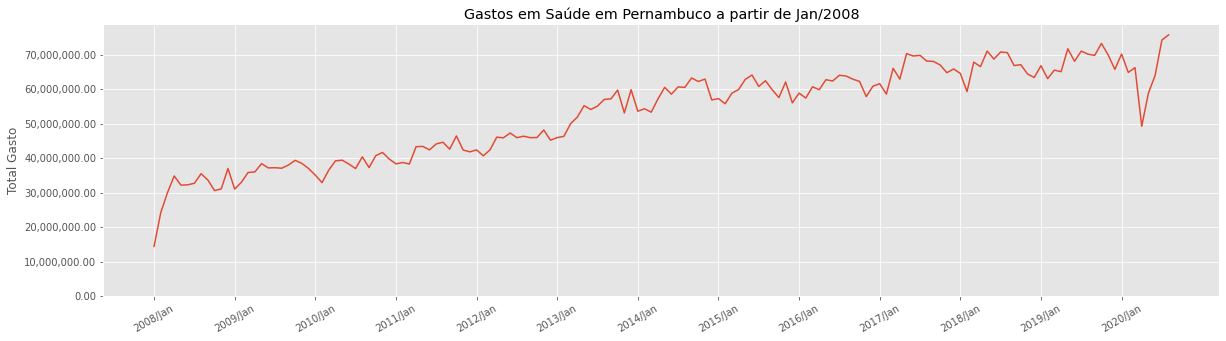

In [35]:
dados_mensais = dados_novo.drop(columns=['Total','Cod_UF','Região']).T
#ax.xaxis.set_major_locator(ticker.AutoLocator())

fig, axs = plt.subplots(1, 1, figsize=(20,5))
ax = sns.lineplot(data = dados_mensais, x = dados_mensais.index, y = 'Pernambuco')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.ylim(0,)
plt.title('Gastos em Saúde em Pernambuco a partir de Jan/2008')
ax.set_ylabel('Total Gasto')
plt.xticks(rotation=30)
plt.show()

### Aula 04

In [36]:
meses = { 

    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez': 12
}

def para_dia(ano_mes : str):
    ano: int = int(ano_mes[:4])
    mes: str = ano_mes[5:]
    mes_numero: int = meses[mes]
    return datetime.date(ano, mes_numero, 1)

dados_mensais.index = dados_mensais.index.map(para_dia)
dados_mensais.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-01-01,91678473.48,45671659.76,38266347.46,30931325.46,23025258.52,21211522.47,14393949.89,16504913.45,15539821.90,15310637.29,18864744.11,10723506.39,5456723.98,5947814.08,10723002.45,4745919.19,5377392.11,7985142.43,6243726.32,4795299.01,4735529.42,2780750.11,3441592.69,1388528.39,902416.00,657889.53,1120973.34
2008-02-01,148677526.82,70194037.10,55384670.52,57363420.01,28394310.93,28189304.95,24181400.95,25651429.11,25735101.55,22258668.68,19553758.20,13559679.41,9102212.86,9509755.83,11386274.47,7632480.67,7002472.61,10079928.25,8376622.16,8684882.23,7118990.57,3676483.16,4985688.85,2931283.42,1497206.26,777939.31,1268740.33
2008-03-01,156087269.23,79231336.95,53801318.85,51547794.07,44567062.94,34181483.52,29991302.71,26743524.89,28724625.75,21442515.75,21937342.70,13985142.36,10249595.97,10352238.59,12053643.87,9647203.26,8423933.19,10298372.45,8408336.22,7886243.14,8196635.49,5051473.61,6205612.60,1541682.52,1794028.48,718688.03,974651.24
2008-04-01,161227125.43,77136537.58,52460306.69,56673338.49,44054604.82,39026934.13,34806197.97,27181488.26,30676457.06,20921212.45,20842829.69,14809416.46,11253833.56,10855108.50,12653528.76,11098732.99,8797487.68,10775976.33,9090794.82,8794109.79,8259378.42,5046063.36,4984482.09,1525314.96,1730469.42,839994.39,1141137.32
2008-05-01,187119397.64,80554440.63,54419620.71,48397733.07,44911021.15,42949566.82,32147987.35,26845308.18,30604453.47,21615970.67,23249952.88,14505727.38,10198619.17,11160168.19,12215107.11,12891719.72,9770421.80,10398360.88,9338771.45,9231645.40,7831399.90,4741151.56,5511002.46,1645953.84,1819443.92,862347.96,866346.18


In [37]:
dados_mensais_melt = dados_mensais.reset_index().melt(id_vars=["index"], value_vars=dados_mensais.columns)
dados_mensais_melt.columns = ['Data','UF','Valor Gasto']
dados_mensais_melt['Data'] = dados_mensais_melt['Data'].astype('datetime64')
dados_mensais_melt.head(5)

,Data,UF,Valor Gasto
0,2008-01-01,São Paulo,91678473.48
1,2008-02-01,São Paulo,148677526.82
2,2008-03-01,São Paulo,156087269.23
3,2008-04-01,São Paulo,161227125.43
4,2008-05-01,São Paulo,187119397.64


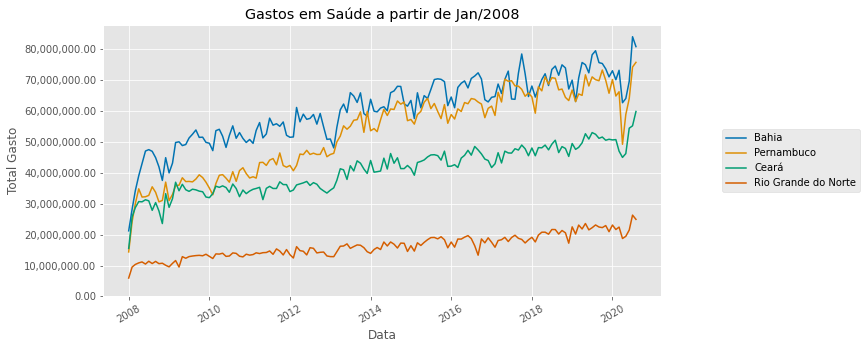

In [38]:
fig, axs = plt.subplots(1, 1, figsize=(10,5))
ax = sns.lineplot(data = dados_mensais_melt.loc[dados_mensais_melt['UF'].isin(['Pernambuco','Bahia','Ceará','Rio Grande do Norte'])], x = 'Data', y = 'Valor Gasto', hue='UF', palette='colorblind')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylim(0,)
#sns.color_palette('pastel')
plt.title('Gastos em Saúde a partir de Jan/2008')
ax.set_ylabel('Total Gasto')
plt.xticks(rotation=30)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

In [39]:
#Criando colunas de Mês e Ano
dados_mensais_melt['Ano'] = dados_mensais_melt['Data'].dt.year
dados_mensais_melt['Mes'] = dados_mensais_melt['Data'].dt.month
dados_mensais_melt.head(5)

,Data,UF,Valor Gasto,Ano,Mes
0,2008-01-01,São Paulo,91678473.48,2008,1
1,2008-02-01,São Paulo,148677526.82,2008,2
2,2008-03-01,São Paulo,156087269.23,2008,3
3,2008-04-01,São Paulo,161227125.43,2008,4
4,2008-05-01,São Paulo,187119397.64,2008,5


In [40]:
#dados_mensais_melt.query("UF=='Pernambuco'")

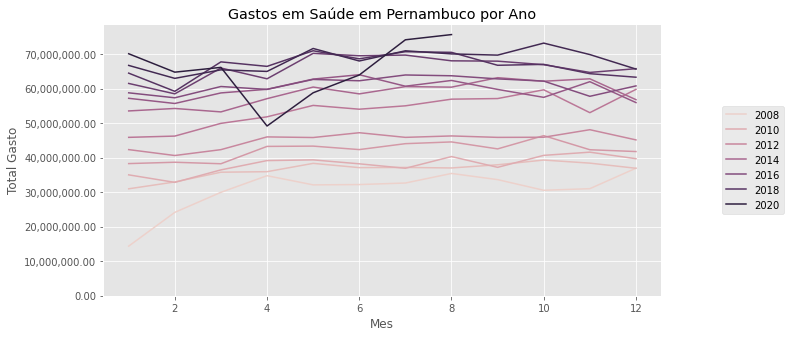

In [41]:
fig, axs = plt.subplots(1, 1, figsize=(10,5))
ax = sns.lineplot(data = dados_mensais_melt.loc[dados_mensais_melt['UF'].isin(['Pernambuco'])], x = 'Mes', y = 'Valor Gasto', hue='Ano')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylim(0,)
plt.title('Gastos em Saúde em Pernambuco por Ano')
ax.set_ylabel('Total Gasto')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()